## IBM Machine learning certificate
### Time Series Module project
### By Zahra Adahman

## Main Objective
### How does the changes in daily temperature relate with the amount of violent crimes in Massachusetts state?
### Here, we attempt to build a time series models using a dataset on the average temperature in Massachusetts


### Then a time series correlation analysis was performed to determine the relationship between crime rate and temperature changes across the state.

In [2]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
import warnings
warnings.simplefilter(action='ignore')


## Materials and techniques
### The daily tempearture dataset was gotten from AWS Marketplace 
### by https://theclimatedatafactory.com/ 
### https://aws.amazon.com/marketplace/pp/prodview-imlqd3epbsufk?sr=0-2&ref_=beagle&applicationId=AWSMPContessa#overview

### The dataset contains daily temperature data from January 1st, 2018-October  11th, 2020 across major cities, Boston, MA, Chicago, IL, New Orleans, LA, Seattle, WA, Atlanta, GA, and New York, NY,

### Here the dataset is loaded as a dataframe and a new dataset is process containily on the data from Boston MA, to represent the temperature data for Massachusetts State.

In [3]:
temp = pd.read_csv('temp20182020.csv')

#data from AWS Marketplace https://theclimatedatafactory.com/ 
#https://aws.amazon.com/marketplace/pp/prodview-imlqd3epbsufk?sr=0-2&ref_=beagle&applicationId=AWSMPContessa#overview

In [4]:
temp.head(5)

,city,date,avgTemp,maxTemp,minTemp,prcp
0,Atlanta,20180101,23.5,29,18,0.0
1,Boston,20180101,6.5,13,0,0.0
2,Atlanta,20180102,24.5,36,13,0.0
3,Boston,20180102,11.5,19,4,0.0
4,Atlanta,20180103,33.0,39,27,0.0


In [5]:
temp.shape

(6090, 6)

In [6]:
temp.dtypes

city        object
date         int64
avgTemp    float64
maxTemp      int64
minTemp      int64
prcp       float64
dtype: object

In [7]:
#convert temp['date'] to date format
                                   
temp['date'] = pd.to_datetime(temp['date'].astype(str), format='%Y%m%d', errors = 'coerce')

In [8]:
temp.head(5)

,city,date,avgTemp,maxTemp,minTemp,prcp
0,Atlanta,2018-01-01,23.5,29,18,0.0
1,Boston,2018-01-01,6.5,13,0,0.0
2,Atlanta,2018-01-02,24.5,36,13,0.0
3,Boston,2018-01-02,11.5,19,4,0.0
4,Atlanta,2018-01-03,33.0,39,27,0.0


In [9]:
temp.dtypes

city               object
date       datetime64[ns]
avgTemp           float64
maxTemp             int64
minTemp             int64
prcp              float64
dtype: object

In [10]:
temp.describe()

,avgTemp,maxTemp,minTemp,prcp
count,6090.000000,6090.000000,6090.000000,6090.000000
mean,59.667816,67.531856,51.803777,0.138967
std,17.526891,18.506524,17.035435,0.378406
min,-16.500000,-10.000000,-23.000000,0.000000
25%,46.000000,53.000000,39.000000,0.000000
50%,61.000000,70.000000,53.000000,0.000000
75%,74.500000,83.000000,66.000000,0.080000
max,91.500000,100.000000,84.000000,6.240000


In [11]:
#find missing data
temp.info
print(temp.isnull().sum())

city       0
date       0
avgTemp    0
maxTemp    0
minTemp    0
prcp       0
dtype: int64


In [12]:
print(temp['city'].value_counts())

New Orleans      1015
Seattle          1015
Boston           1015
New York City    1015
Chicago          1015
Atlanta          1015
Name: city, dtype: int64


In [13]:
#Lets check out the start and end dates
dates = sorted(temp['date'].unique())
print('Start date is', dates[0], '\n' 'End date is', dates[1014])

Start date is 2018-01-01T00:00:00.000000000 
End date is 2020-10-11T00:00:00.000000000


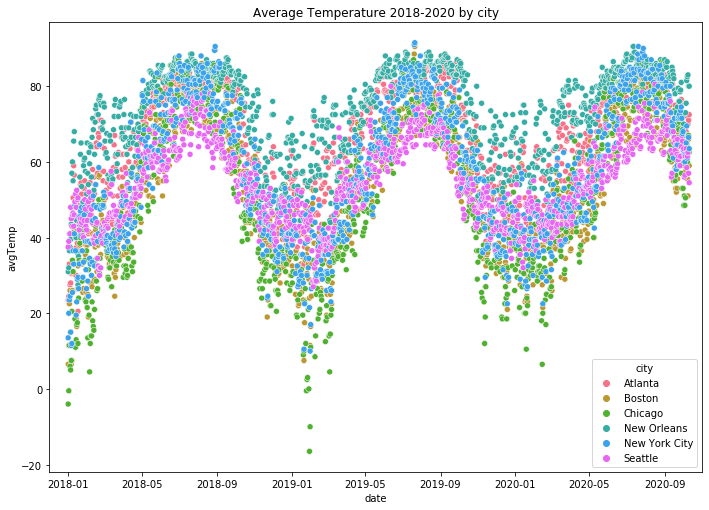

In [14]:
#avgTemp over time by city
#plot by city
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=temp, x="date", y="avgTemp", hue="city", ax=ax)
#set limit of the report date on x axis
ax.set(xlim=('2017-12-01','2020-11-01'))
#setting the title of the figure
ax.set(title=("Average Temperature 2018-2020 by city"))

#save file and image, remember to rename file name otherwise, it will rewrite
#lt.savefig('COVID_19_4.png')
plt.show()

In [15]:
#Lets create a data set of the temperature data of just Massachusetts state 
#Assuming the daily Boston temperature is about the same across the state. 
temp_mass=temp[(temp['city'] == 'Boston')]
temp_mass.head()

,city,date,avgTemp,maxTemp,minTemp,prcp
1,Boston,2018-01-01,6.5,13,0,0.00
3,Boston,2018-01-02,11.5,19,4,0.00
5,Boston,2018-01-03,22.5,29,16,0.00
7,Boston,2018-01-04,26.0,30,22,1.35
9,Boston,2018-01-05,15.0,24,6,0.00


In [16]:
temp_mass.shape

(1015, 6)

In [17]:
#Lets sort the time in the temp_mass dataset and check the time interval
temp_mass = temp_mass.sort_values(by='date')

# Check time intervals
temp_mass['delta'] = temp_mass['date'] - temp_mass['date'].shift(1)

temp_mass[['date', 'delta']].head()

,date,delta
1,2018-01-01,NaT
3,2018-01-02,1 days
5,2018-01-03,1 days
7,2018-01-04,1 days
9,2018-01-05,1 days


In [18]:
temp_mass['delta'].sum(), temp_mass['delta'].count()

(Timedelta('1014 days 00:00:00'), 1014)

In [19]:
temp_mass.head(5)

,city,date,avgTemp,maxTemp,minTemp,prcp,delta
1,Boston,2018-01-01,6.5,13,0,0.00,NaT
3,Boston,2018-01-02,11.5,19,4,0.00,1 days
5,Boston,2018-01-03,22.5,29,16,0.00,1 days
7,Boston,2018-01-04,26.0,30,22,1.35,1 days
9,Boston,2018-01-05,15.0,24,6,0.00,1 days


### The crime data for mass from 2018 to 2020 was gotten from the Federal Bureau of Investigation Crime Data Explorer, and Uniform Crime Reporting Program. The compressed file folder was downloaded for each of the year 2018, 2019 and 2020 and the incident.csv files were extracted for each year. It is important to note that only the number or frequency of crime reported will be analysised. Additional data is located in the compressed zip files such as location, type of offense etc. 
### See image below. 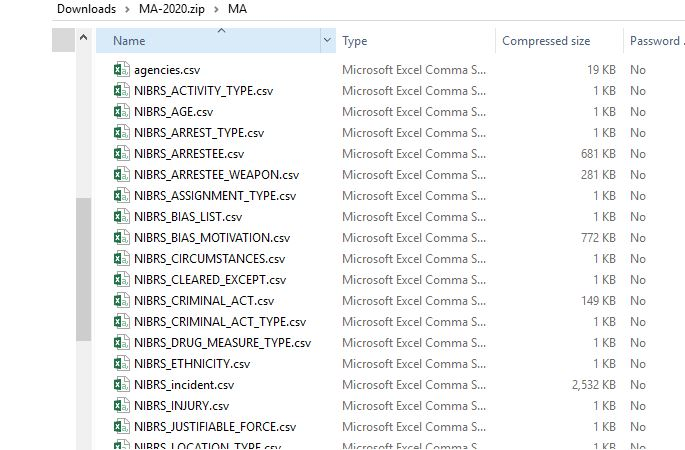

### https://crime-data-explorer.fr.cloud.gov/pages/downloads

### The frequency of crime /incident reported will be computed from the dataset fro each year and the data set from each year 2018 and 2020 will be combined into one dataset.

In [20]:
mass_2018 = pd.read_csv('mass_2018.csv', parse_dates=['INCIDENT_DATE'])
mass_2019 = pd.read_csv('mass_2019.csv', parse_dates=['INCIDENT_DATE'])
mass_2020 = pd.read_csv('mass_2020.csv', parse_dates=['INCIDENT_DATE'])
print ('mass_2018 is', mass_2018.shape ,'\n')
print ('mass_2019 is', mass_2019.shape ,'\n')
print ('mass_2020 is', mass_2020.shape)


mass_2018 is (169343, 15) 

mass_2019 is (170461, 15) 

mass_2020 is (216195, 15)


In [21]:
# Combine all the dataframes for 2018 through 2020
crime_Mass = pd.concat([mass_2018, mass_2019, mass_2020], ignore_index=True)
crime_Mass.shape

(555999, 15)

In [22]:
crime_Mass.head(5)

,DATA_YEAR,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,SUBMISSION_DATE,INCIDENT_DATE,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,CLEARED_EXCEPT_DATE,INCIDENT_STATUS,DATA_HOME,ORIG_FORMAT,DID
0,2018,7676,104967192,8669027,NaN,22-FEB-19,2018-09-05,NaN,9,6,NaN,0,C,F,35225187
1,2018,7676,104967205,8669027,N,22-FEB-19,2018-09-09,NaN,14,6,NaN,0,C,F,35233842
2,2018,7676,104967212,8669027,NaN,22-FEB-19,2018-09-16,NaN,17,6,NaN,0,C,F,35228305
3,2018,7676,104965874,8669027,N,22-FEB-19,2018-09-20,NaN,17,6,NaN,0,C,F,35228311
4,2018,7676,104965896,8666681,NaN,22-FEB-19,2018-10-02,NaN,14,6,NaN,0,C,F,35225215


In [23]:
#find missing data
crime_Mass.info
print(crime_Mass.isnull().sum())

DATA_YEAR                   0
AGENCY_ID                   0
INCIDENT_ID                 0
NIBRS_MONTH_ID              0
CARGO_THEFT_FLAG       312579
SUBMISSION_DATE             0
INCIDENT_DATE               0
REPORT_DATE_FLAG       508487
INCIDENT_HOUR               0
CLEARED_EXCEPT_ID           0
CLEARED_EXCEPT_DATE    554351
INCIDENT_STATUS             0
DATA_HOME                   0
ORIG_FORMAT                 0
DID                         0
dtype: int64


In [24]:
crime_Mass.dtypes

DATA_YEAR                       int64
AGENCY_ID                       int64
INCIDENT_ID                     int64
NIBRS_MONTH_ID                  int64
CARGO_THEFT_FLAG               object
SUBMISSION_DATE                object
INCIDENT_DATE          datetime64[ns]
REPORT_DATE_FLAG               object
INCIDENT_HOUR                   int64
CLEARED_EXCEPT_ID               int64
CLEARED_EXCEPT_DATE            object
INCIDENT_STATUS                 int64
DATA_HOME                      object
ORIG_FORMAT                    object
DID                             int64
dtype: object

In [25]:
#Create a new df by dropping all the columns except 'INCIDENT_DATE'
crime_Mass_freq = crime_Mass[['INCIDENT_DATE']]
#to keep header and index please use double square brackets.
crime_Mass_freq.columns = ['INCIDENT_DATE']
crime_Mass_freq.shape

(555999, 1)

In [26]:
crime_Mass_freq.head(5)

,INCIDENT_DATE
0,2018-09-05
1,2018-09-09
2,2018-09-16
3,2018-09-20
4,2018-10-02


In [27]:
crime_Mass_freq['INCIDENT_DATE'].value_counts()

2020-11-20    1283
2020-11-09    1241
2020-11-16    1239
2020-10-26    1192
2020-10-23    1160
              ... 
2018-03-13     243
2019-01-20     236
2018-12-25     226
2018-11-22     217
2018-01-04     205
Name: INCIDENT_DATE, Length: 1096, dtype: int64

In [28]:
crime_Mass_freq['frequency'] =crime_Mass_freq.groupby('INCIDENT_DATE')['INCIDENT_DATE'].transform('count')
crime_Mass_freq.head(5)

,INCIDENT_DATE,frequency
0,2018-09-05,523
1,2018-09-09,395
2,2018-09-16,453
3,2018-09-20,543
4,2018-10-02,478


In [29]:
crime_Mass_freq.shape

(555999, 2)

In [30]:
# drop duplicate rows
crime_Mass_freq = crime_Mass_freq.drop_duplicates()
crime_Mass_freq.shape

(1096, 2)

In [31]:
#Just to check ^.^
crime_Mass_freq['frequency'].sum()

555999

In [32]:
crime_Mass_freq.describe()

,frequency
count,1096.000000
mean,507.298358
std,129.668891
min,205.000000
25%,437.000000
50%,486.500000
75%,544.250000
max,1283.000000


In [33]:
dates1 = sorted(crime_Mass_freq['INCIDENT_DATE'].unique())
print('Start date is', dates1[0], '\n' 'End date is', dates1[1095])

Start date is 2018-01-01T00:00:00.000000000 
End date is 2020-12-31T00:00:00.000000000


In [34]:
#Lets sort the time in the temp_mass dataset and check the time interval
crime_Mass_freq = crime_Mass_freq.sort_values(by='INCIDENT_DATE')

# Check time intervals
crime_Mass_freq['delta'] = crime_Mass_freq['INCIDENT_DATE'] - crime_Mass_freq['INCIDENT_DATE'].shift(1)

crime_Mass_freq[['INCIDENT_DATE', 'delta']].head()

,INCIDENT_DATE,delta
557,2018-01-01,NaT
905,2018-01-02,1 days
975,2018-01-03,1 days
446,2018-01-04,1 days
458,2018-01-05,1 days


In [35]:
crime_Mass_freq.head(5)

,INCIDENT_DATE,frequency,delta
557,2018-01-01,363,NaT
905,2018-01-02,384,1 days
975,2018-01-03,405,1 days
446,2018-01-04,205,1 days
458,2018-01-05,289,1 days


In [36]:
crime_Mass_freq.drop('delta', axis=1)

,INCIDENT_DATE,frequency
557,2018-01-01,363
905,2018-01-02,384
975,2018-01-03,405
446,2018-01-04,205
458,2018-01-05,289
...,...,...
340822,2020-12-27,393
340035,2020-12-28,531
340297,2020-12-29,520
340853,2020-12-30,482


## Data visualization and analysis

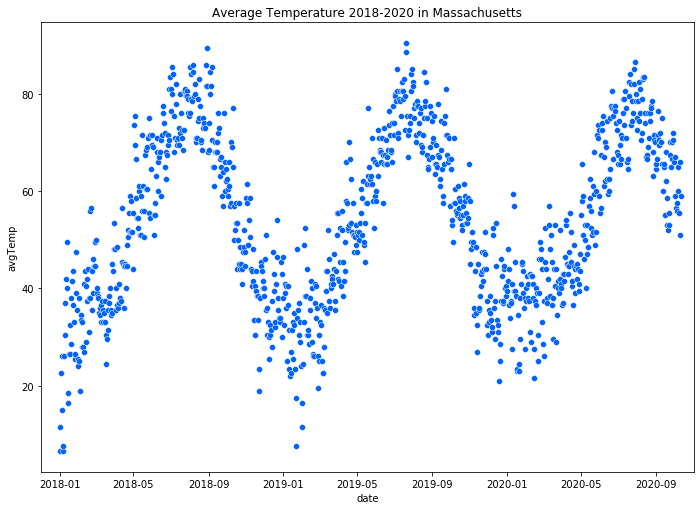

In [38]:
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=temp_mass, x="date", y="avgTemp", ax=ax)
ax.set(xlim=('2017-12-01','2020-11-01'))
ax.set(title=("Average Temperature 2018-2020 in Massachusetts"))
plt.show()

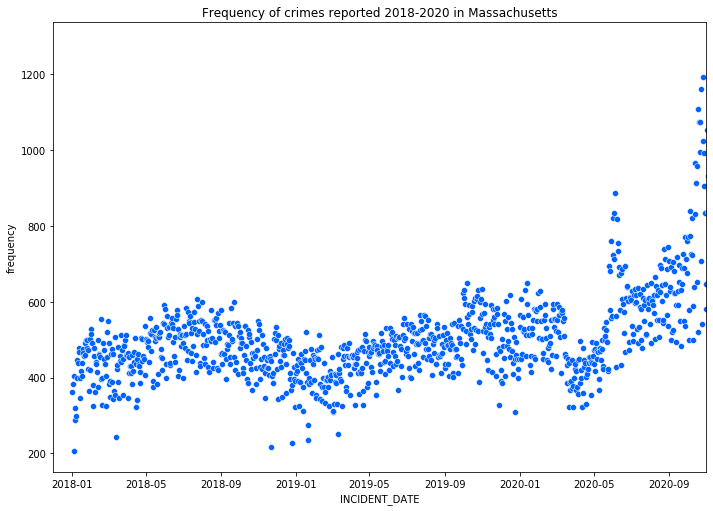

In [37]:
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=crime_Mass_freq, x="INCIDENT_DATE", y="frequency", ax=ax)
ax.set(xlim=('2017-12-01','2020-11-01'))
ax.set(title=("Frequency of crimes reported 2018-2020 in Massachusetts"))
plt.show()

### Checking for patterns in the Massachusetts temperature dataset for stationarity, Irregularity and trends of this timeseries data

In [39]:
#Augmented Dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(temp_mass['avgTemp'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                   -2.501154
p-value                           0.115194
#lags used                        9.000000
number of observations used    1005.000000
critical value (1%)              -3.436873
critical value (5%)              -2.864420
critical value (10%)             -2.568304
dtype: float64


### Since the  p value is more than 0.05, we will fail to reject the **Null hypothesis:** that the series is nonstationary.
### In addition the test statistic ADF value (-2.5) is not less than the critical values (-3.44 , -2.86 , -2.57) at different percentages . In this case, we cannot reject our null hypothesis and conclude that the temp_mass dataset is nonstationary.

In [40]:
#Augmented Dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest1 = adfuller(crime_Mass_freq['frequency'],autolag='AIC')
dfoutput1=pd.Series(dftest1[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput1['critical value (%s)'%key]= value
print(dfoutput1)

Observations of Dickey-fuller test
Test Statistic                   -2.445794
p-value                           0.129226
#lags used                       21.000000
number of observations used    1074.000000
critical value (1%)              -3.436873
critical value (5%)              -2.864420
critical value (10%)             -2.568304
dtype: float64


### Since the  p value is 0.13, we will fail to reject the **Null hypothesis:** that the series is nonstationary.
### In addition the test statistic ADF value (-2.4) is not less than the critical values (-3.44 , -2.86 , -2.57) at different percentages . In this case, we cannot reject our null hypothesis and conclude that the temp_mass dataset is nonstationary.

## Both data sets will have to be transformed.

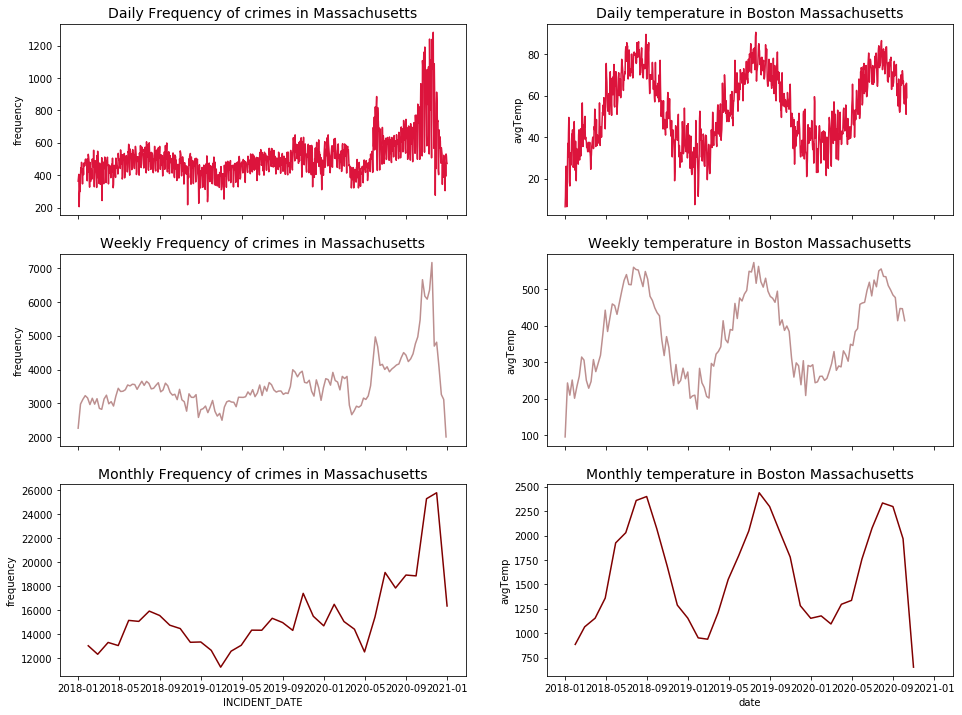

In [45]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

#Crime frequency in MA

sns.lineplot(crime_Mass_freq['INCIDENT_DATE'], crime_Mass_freq['frequency'], color='crimson', ax=ax[0, 0])
ax[0, 0].set_title('Daily Frequency of crimes in Massachusetts', fontsize=14)

resamp_crime_Mass_freq = crime_Mass_freq[['INCIDENT_DATE','frequency']].resample('7D', on='INCIDENT_DATE').sum().reset_index(drop=False)
sns.lineplot(resamp_crime_Mass_freq['INCIDENT_DATE'], resamp_crime_Mass_freq['frequency'], color='rosybrown', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Frequency of crimes in Massachusetts', fontsize=14)

resamp_crime_Mass_freq = crime_Mass_freq[['INCIDENT_DATE','frequency']].resample('M', on='INCIDENT_DATE').sum().reset_index(drop=False)
sns.lineplot(resamp_crime_Mass_freq['INCIDENT_DATE'], resamp_crime_Mass_freq['frequency'], color='maroon', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Frequency of crimes in Massachusetts', fontsize=14)

#Temperature in MA

sns.lineplot(temp_mass['date'], temp_mass['avgTemp'], color='crimson', ax=ax[0, 1])
ax[0, 1].set_title('Daily temperature in Boston Massachusetts', fontsize=14)

resamp_temp_mass = temp_mass[['date','avgTemp']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(resamp_temp_mass['date'], resamp_temp_mass['avgTemp'], color='rosybrown', ax=ax[1, 1])
ax[1, 1].set_title('Weekly temperature in Boston Massachusetts', fontsize=14)

resamp_temp_mass = temp_mass[['date','avgTemp']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(resamp_temp_mass['date'], resamp_temp_mass['avgTemp'], color='maroon', ax=ax[2, 1])
ax[2, 1].set_title('Monthly temperature in Boston Massachusetts', fontsize=14)

    
plt.show()

### The weekly date looks better/smoother. The two dataframes temp_mass and crime_Mass_freq will be combined and set at weekly time interval by downsampling.

In [47]:
#rename crime_Mass_freq column to match
crime_Mass_freq=crime_Mass_freq.rename(columns={"INCIDENT_DATE": "date"})
crime_Mass_freq.head(5)

,date,frequency,delta
557,2018-01-01,363,NaT
905,2018-01-02,384,1 days
975,2018-01-03,405,1 days
446,2018-01-04,205,1 days
458,2018-01-05,289,1 days


In [48]:
#combine the dfs
merged_Mass = pd.merge(crime_Mass_freq, temp_mass, on="date")
merged_Mass.shape


(1015, 9)

In [49]:
#find missing data
merged_Mass.info
print(merged_Mass.isnull().sum())

date         0
frequency    0
delta_x      1
city         0
avgTemp      0
maxTemp      0
minTemp      0
prcp         0
delta_y      1
dtype: int64


In [51]:
#delete the other columns not needed
merged_Mass=merged_Mass[['date','frequency','avgTemp']]
merged_Mass.head(5)

,date,frequency,avgTemp
0,2018-01-01,363,6.5
1,2018-01-02,384,11.5
2,2018-01-03,405,22.5
3,2018-01-04,205,26.0
4,2018-01-05,289,15.0


In [52]:
dates2 = sorted(merged_Mass['date'].unique())
print('Start date is', dates2[0], '\n' 'End date is', dates2[1014])

Start date is 2018-01-01T00:00:00.000000000 
End date is 2020-10-11T00:00:00.000000000


In [53]:
#donwsample to the weekly dataset
downsample = merged_Mass[['date',
                 'frequency', 
                 'avgTemp',
                ]].resample('7D', on='date').mean().reset_index(drop=False)
merged_Mass2= downsample.copy()
merged_Mass2.shape



(145, 3)

In [54]:
merged_Mass2.head(5)

,date,frequency,avgTemp
0,2018-01-01,323.428571,13.642857
1,2018-01-08,425.285714,34.785714
2,2018-01-15,445.428571,30.000000
3,2018-01-22,461.142857,35.928571
4,2018-01-29,451.428571,28.785714


### Let's repeat the stationarity test after smoothing the dataset to the weekly time-interval...

In [57]:
from statsmodels.tsa.stattools import adfuller

print("Observations of Dickey-fuller test")
dftest = adfuller(merged_Mass2['frequency'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                  -2.607564
p-value                          0.091444
#lags used                       0.000000
number of observations used    144.000000
critical value (1%)             -3.476598
critical value (5%)             -2.881829
critical value (10%)            -2.577589
dtype: float64


In [58]:
from statsmodels.tsa.stattools import adfuller

print("Observations of Dickey-fuller test")
dftest = adfuller(merged_Mass2['avgTemp'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -5.822793e+00
p-value                        4.145246e-07
#lags used                     1.100000e+01
number of observations used    1.330000e+02
critical value (1%)           -3.480500e+00
critical value (5%)           -2.883528e+00
critical value (10%)          -2.578496e+00
dtype: float64


### The smoothed temperature variable is stationary as p-value is 4.15 X 10^-7, the test statistic ADF value (-5.82) is not less than the critical values (-3.48 , -2.88 , -2.58) at different percentages. However the frequency of crime data is not as p-value is 0.09 the test statistic ADF value (-2.6) is not less than the critical values (-3.48 , -2.88 , -2.58) at different percentages.

### The crime data series has to be transformed into stationarity ones.

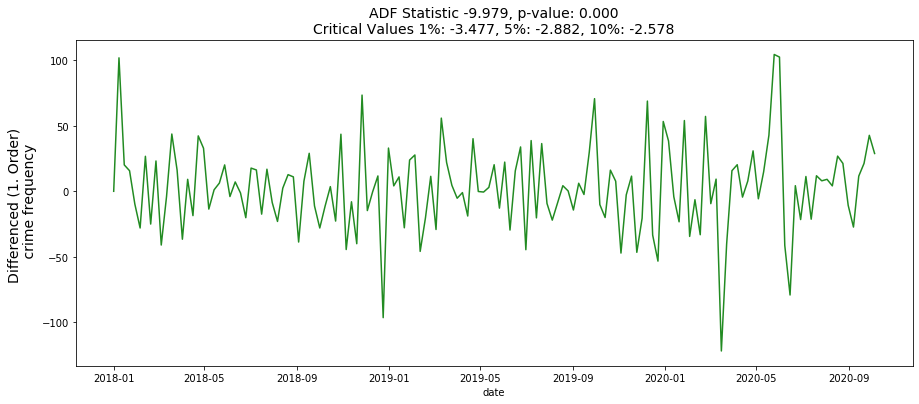

In [69]:
# First Order Differencing
#since we are using a open source function let define df
df=merged_Mass2
ts_diff = np.diff(merged_Mass2['frequency'])
merged_Mass2['frequency_diff'] = np.append([0], ts_diff)

                                #***************
    # Thanks to https://www.kaggle.com/iamleonie for this function!

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)
                                
                                      #***************
        
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(merged_Mass2['frequency_diff'], 'Differenced (1. Order) \n crime frequency', ax)

## Times series decomposition

In [64]:
#feture engineering 
merged_Mass2['year'] = pd.DatetimeIndex(merged_Mass2['date']).year
merged_Mass2['month'] = pd.DatetimeIndex(merged_Mass2['date']).month
merged_Mass2['day'] = pd.DatetimeIndex(merged_Mass2['date']).day
merged_Mass2['day_of_year'] = pd.DatetimeIndex(merged_Mass2['date']).dayofyear
merged_Mass2['week_of_year'] = pd.DatetimeIndex(merged_Mass2['date']).weekofyear
merged_Mass2['quarter'] = pd.DatetimeIndex(merged_Mass2['date']).quarter
merged_Mass2['season'] = merged_Mass2['month'] % 12 // 3 + 1

merged_Mass2[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2018-01-01,2018,1,1,1,1,1,1
1,2018-01-08,2018,1,8,8,2,1,1
2,2018-01-15,2018,1,15,15,3,1,1
3,2018-01-22,2018,1,22,22,4,1,1
4,2018-01-29,2018,1,29,29,5,1,1


In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

columns =  ['frequency', 'avgTemp']

for column in columns:
    decomp = seasonal_decompose(merged_Mass2[column], freq=52, model='additive', extrapolate_trend='freq')
    merged_Mass2[f"{column}_trend"] = decomp.trend
    merged_Mass2[f"{column}_seasonal"] = decomp.seasonal

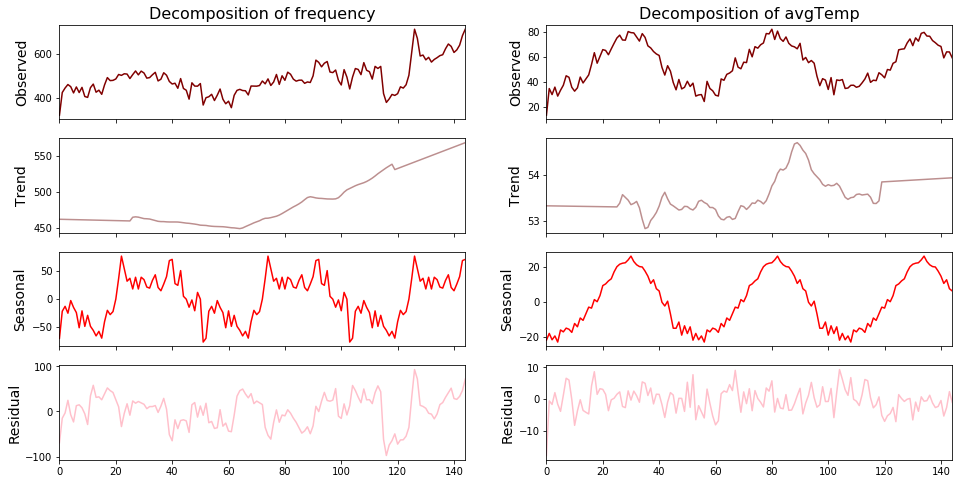

In [70]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['frequency', 'avgTemp']):
    
    res = seasonal_decompose(merged_Mass2[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='maroon')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='rosybrown')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='red')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='pink')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

## Correlation analysis

In [81]:
corr1 = merged_Mass[columns].corr()

corr1


,frequency,avgTemp
frequency,1.000000,0.446341
avgTemp,0.446341,1.000000


In [82]:
corr2 = merged_Mass2[columns].corr()

corr2


,frequency,avgTemp
frequency,1.000000,0.555592
avgTemp,0.555592,1.000000


### About 45% of the regular dataset on frequency of crime and average temperature correlate compared with 56% in the downsampled dataset.

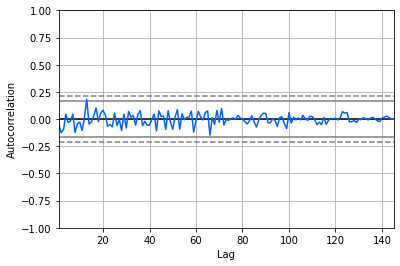

In [84]:
#ACF Plot of differenced frequency of crime time series

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(merged_Mass2['frequency_diff'])
plt.show()

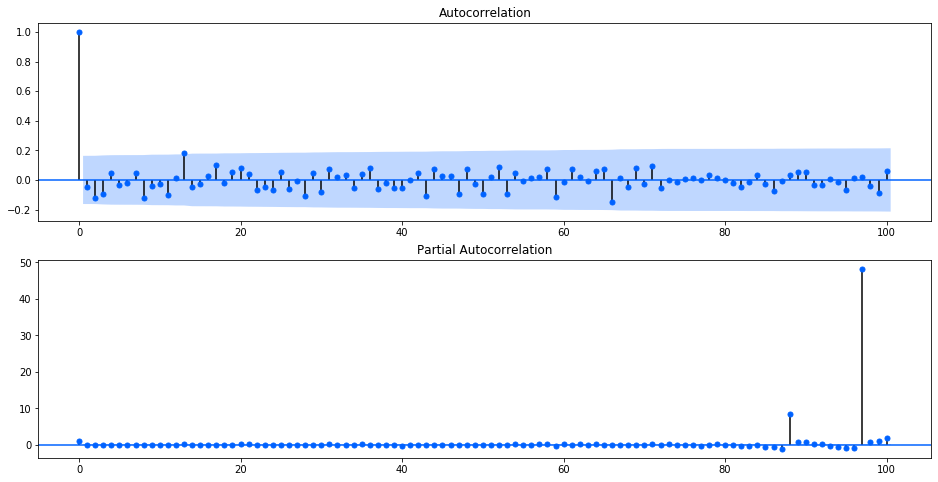

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(merged_Mass2['frequency_diff'], lags=100, ax=ax[0])
plot_pacf(merged_Mass2['frequency_diff'], lags=100, ax=ax[1])

plt.show()

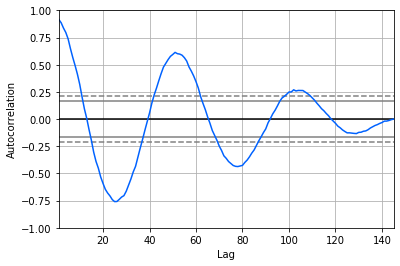

In [87]:
#ACF Plot of differenced frequency of crime time series

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(merged_Mass2['avgTemp'])
plt.show()

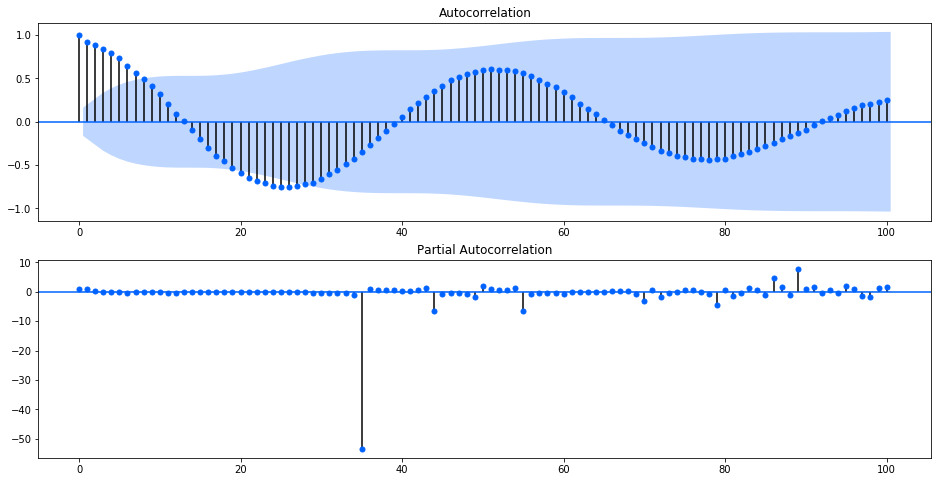

In [86]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(merged_Mass2['avgTemp'], lags=100, ax=ax[0])
plot_pacf(merged_Mass2['avgTemp'], lags=100, ax=ax[1])

plt.show()

## Time-series Modeling

### SARIMA

In [131]:
sar = sm.tsa.statespace.SARIMAX(merged_Mass2.avgTemp, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            avgTemp   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -437.372
Date:                            Sun, 06 Feb 2022   AIC                            882.745
Time:                                    02:31:41   BIC                            894.306
Sample:                                         0   HQIC                           887.443
                                            - 145                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1147      0.114      1.006      0.314      -0.109       0.338
ar.L1          0.9527      0.032     29.803      0.000       0.890       1.015
ma.S.L12      -0.9992     24.725     -0.040      0.968     -49.459      47.461
sigma2        33.3910    824.306      0.041      0.968   -1582.218    1649.000
===================================================================================
Ljung-Box (Q):                       78.61   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.00   Prob(JB):                         0.44
Heteroskedasticity (H):               0.60   Skew:                            -0.12
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

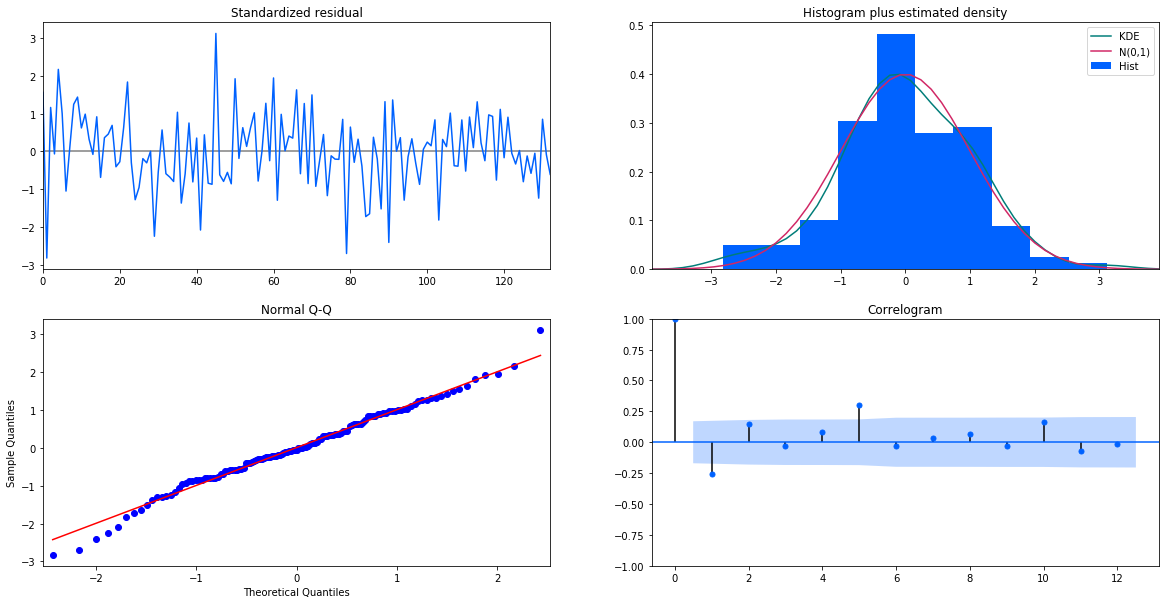

In [134]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

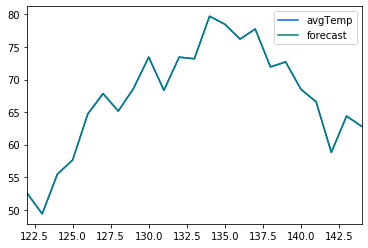

In [98]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
merged_Mass2['forecast'] = sar.predict(start = 100, end= 144)  
merged_Mass2[122:][['avgTemp', 'forecast']].plot();

In [91]:
sar1 = sm.tsa.statespace.SARIMAX(merged_Mass2.frequency, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          frequency   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -665.576
Date:                            Sat, 05 Feb 2022   AIC                           1339.151
Time:                                    02:56:53   BIC                           1350.713
Sample:                                         0   HQIC                          1343.849
                                            - 145                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1398      0.922      2.322      0.020       0.333       3.946
ar.L1          0.8719      0.050     17.464      0.000       0.774       0.970
ma.S.L12      -0.9966      6.115     -0.163      0.871     -12.981      10.988
sigma2      1038.3264   6266.280      0.166      0.868   -1.12e+04    1.33e+04
===================================================================================
Ljung-Box (Q):                       35.19   Jarque-Bera (JB):                12.46
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.09
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

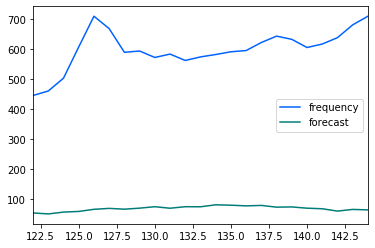

In [99]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
merged_Mass2['forecast'] = sar.predict(start = 100, end= 144)  
merged_Mass2[122:][['frequency', 'forecast']].plot();

In [92]:
sar2 = sm.tsa.statespace.SARIMAX(merged_Mass2.frequency_diff, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                     frequency_diff   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood                -668.858
Date:                            Sat, 05 Feb 2022   AIC                           1345.717
Time:                                    02:57:02   BIC                           1357.278
Sample:                                         0   HQIC                          1350.415
                                            - 145                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2332      0.764      0.305      0.760      -1.265       1.731
ar.L1         -0.0421      0.079     -0.534      0.593      -0.196       0.112
ma.S.L12      -0.9968      5.835     -0.171      0.864     -12.433      10.439
sigma2      1095.0564   6311.467      0.174      0.862   -1.13e+04    1.35e+04
===================================================================================
Ljung-Box (Q):                       35.29   Jarque-Bera (JB):                12.11
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                            -0.11
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

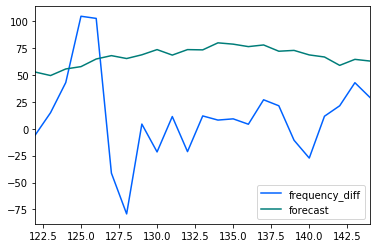

In [100]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
merged_Mass2['forecast'] = sar.predict(start = 100, end= 144)  
merged_Mass2[122:][['frequency_diff', 'forecast']].plot();

### SARIMA forecast doesn't have for the frequency of crime variant. 
### Since, the main aim of this project is to determine the relationship between crime and temperature. A multivariant time series modelling approach would be best to compare the two variables of frequency of crime and average temperature. Also, l based on the correlations results above, there's is moderate correlation between the variables.


### Next, let's use a multi-layered LSTM recurrent neural network to predict the sequence of values.

In [155]:
pip install tensorflow --user

  Using cached https://files.pythonhosted.org/packages/fe/36/7c7c9f106e3026646aa17d599b817525b139e2870f75b532318573cbabd4/tensorflow-2.8.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a7/f1/f89e097f377b163856076f167baf149b010df3bbf425d2c06276048e2051/tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/da/4e/bf276e4dd76c6db2bd8d0e1e0e37f904042fb29269abe375726cf579d4c0/tensorflow_io_gcs_filesystem-0.24.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/05/e4/baf0031e39cf545f0c9edd5b1a2ea12609b7fcba2d58e118b11753d68cf0/typing_extensions-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [147]:
pip install keras

  Using cached https://files.pythonhosted.org/packages/4f/2f/eb9391bdcba2693cc8396f244bd3b4512bcd1123c2ea06f4dfcf50dc5ce9/keras-2.8.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [157]:
#import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'tensorflow'

In [109]:
merged_Mass=merged_Mass[['date','frequency','avgTemp']]
downsample = merged_Mass[['date',
                 'frequency', 
                 'avgTemp',
                ]].resample('7D', on='date').mean().reset_index(drop=False)
merged_Mass2= downsample.copy()

In [110]:
merged_Mass2.info
print(merged_Mass2.isnull().sum())

date         0
frequency    0
avgTemp      0
dtype: int64


## Conclusion and next steps
### A longer timeseries dataset would provide better insights from the dataset. There was some observed trends in the frequency crime begin highest in the warmer months. About 55% of the frequency of crime and temperature data are correlated. There were technical issues installing keras (tensorflow), pmdarima and prophet. However, using SARIMA, forecasting the temperature variable show the seasonality of temerature changes throughout the year. However, forecasting the frequency of crime variable does not captures seasonality with the SARIMA model. Ideally, the objective of this project would be to use prophet to analysis how they two variable are related over time. Also, there was a spike in crime in 2020 after the COVID-19 pandemic began. This is an event to consider for anlaysis lookig at how the variable was before and after the pandemic.